In [1]:
import pandas as pd
import numpy as np
from plotnine import *

In [2]:
spendings = pd.read_csv("/Users/lkhamsurenl/Downloads/2020-01-01_2021-08-14 spendings - Sheet1.csv")
# pre-process the input data to normalize
spendings = (
    spendings
    .assign(Amount = lambda r: -r["Amount"]) 
    .assign(day = lambda r: pd.to_datetime(r["Transaction Date"]))
)
spendings = spendings[(spendings["day"] < "2021-08-01")]

In [3]:
spendings.head()

,Transaction Date,Post Date,Description,Category,Type,Amount,Memo,day
33,07/31/2021,08/03/2021,WAIKIKI OLD COUNTRY MARKE,Groceries,Sale,13.79,NaN,2021-07-31
36,07/31/2021,08/02/2021,TUCKER &amp; BEVVY - PICNIC,Food & Drink,Sale,21.97,NaN,2021-07-31
40,07/30/2021,08/01/2021,DECK &amp; KNOTS,Food & Drink,Sale,14.25,NaN,2021-07-30
41,07/29/2021,08/01/2021,ABC #33 HAWAII,Shopping,Sale,11.45,NaN,2021-07-29
42,07/29/2021,08/01/2021,DECK &amp; KNOTS,Food & Drink,Sale,14.57,NaN,2021-07-29


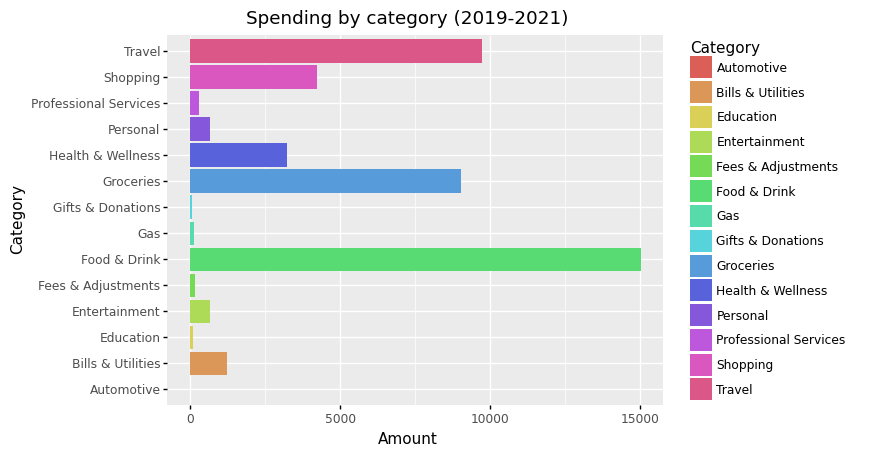

<ggplot: (-9223372036556310798)>

In [5]:
# Q: Spending by category

(
    spendings[(spendings["Type"] != "Payment")]
    .groupby(["Category"])
    .sum()
    .reset_index()
    .pipe(ggplot)
    +aes(x = "Category", y = "Amount", fill = "Category") 
    +geom_bar(stat="identity")
    +coord_flip()
    +labs(
        title = "Spending by category (2019-2021)"
    )
)

Notes:
* Most money is spent on takeout
* Ideally I should be spending more on grocery than on takeout
* Travel is up there! (For the good or for worse)

## Monthly spendings

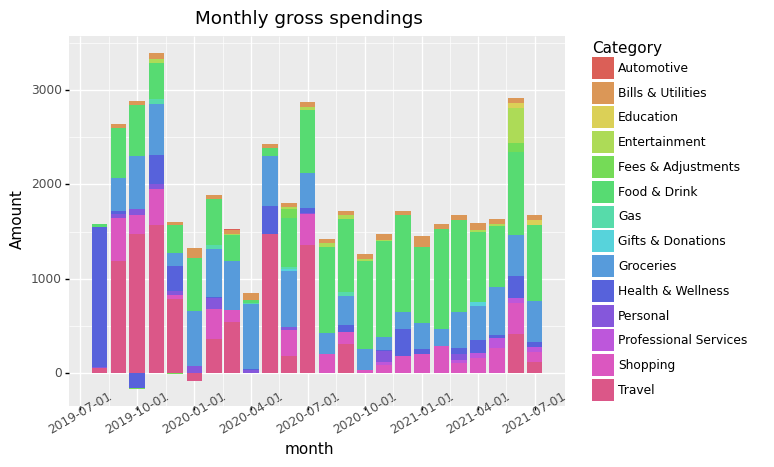

<ggplot: (298637039)>

In [6]:
# Monthly spending over time

(
    spendings[(spendings["Type"] != "Payment")]
    .assign(month = lambda r: r["day"] + pd.offsets.MonthBegin(-1))
    .groupby(["month", "Category"])
    .sum()
    .reset_index()
    .pipe(ggplot)
    +aes(x = "month", fill = "Category", y = "Amount")
    +geom_bar(stat = "identity")
    +labs(
        title = "Monthly gross spendings"
    )
    +scale_x_date(date_breaks="3 month")
    +theme(axis_text_x = element_text(angle = 30, vjust = -0.7, hjust=-0.5))
)

Notes:
* Travel is quite expensive (or at least my travel spending is) regardless of when you do it huh?
* Monthly spending is surprisingly consistent once the pandemic started and no more travels

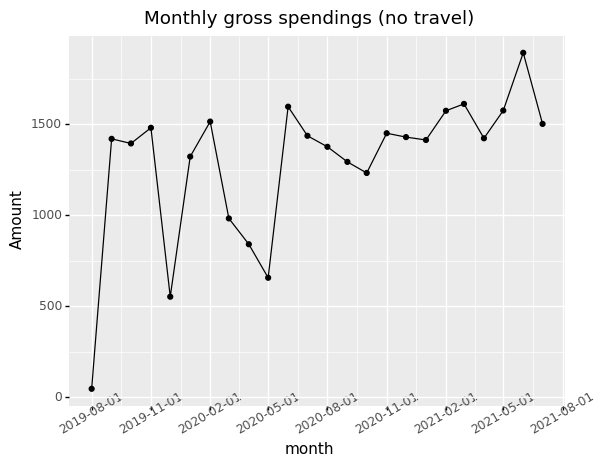

<ggplot: (303210707)>

In [148]:
(
    spendings[
        (spendings["Type"] != "Payment") & 
        ~(spendings["Category"].isin(["Travel", "Entertainment", "Health & Wellness"]))
    ]
    .assign(month = lambda r: r["day"] + pd.offsets.MonthBegin(-1))
    .groupby("month")
    .sum()
    .reset_index()
    .pipe(ggplot)
    +aes(x = "month", y = "Amount")
    +geom_line()
    +geom_point()
    +labs(
        title = "Monthly gross spendings (no travel)"
    )
    +scale_x_date(date_breaks="3 month")
    +theme(axis_text_x = element_text(angle = 30, vjust = -0.7, hjust=-0.5))
)

In [149]:
# Wait, why is 2021-06 spending so much of an outlier?
(
    spendings[
        (spendings["day"] >= "2021-06-01") & 
        (spendings["day"] < "2021-07-01") & 
        (spendings["Category"] != "Travel") 
    ]
    .sort_values(by=["Amount"], ascending=False)
    .head(10)
)

,Transaction Date,Post Date,Description,Category,Type,Amount,Memo,day
195,06/15/2021,06/16/2021,TOUR* NA PALI,Entertainment,Sale,332.14,NaN,2021-06-15
219,06/08/2021,06/10/2021,DREAM VISION EYE CARE,Health & Wellness,Sale,237.07,NaN,2021-06-08
233,06/04/2021,06/06/2021,G* GOAT970#57669,Shopping,Sale,140.04,NaN,2021-06-04
150,06/29/2021,06/30/2021,G* GOAT669#37247,Shopping,Sale,109.73,NaN,2021-06-29
205,06/13/2021,06/14/2021,COURSRAAPYCE8DEWKM3OC,Education,Sale,49.00,NaN,2021-06-13
250,06/01/2021,06/02/2021,GOOGLE *CLOUD_011FD4-E,Professional Services,Sale,48.45,NaN,2021-06-01
154,06/28/2021,06/29/2021,SQ *SNORKEL BOB'S OAHU ST,Entertainment,Sale,46.07,NaN,2021-06-28
193,06/17/2021,06/17/2021,VZWRLSS*PRPAY AUTOPAY,Bills & Utilities,Sale,40.48,NaN,2021-06-17
160,06/25/2021,06/27/2021,SQ *HANALEI BREAD COMPANY,Food & Drink,Sale,37.33,NaN,2021-06-25
217,06/09/2021,06/11/2021,ABC #21 HAWAII,Groceries,Sale,31.91,NaN,2021-06-09


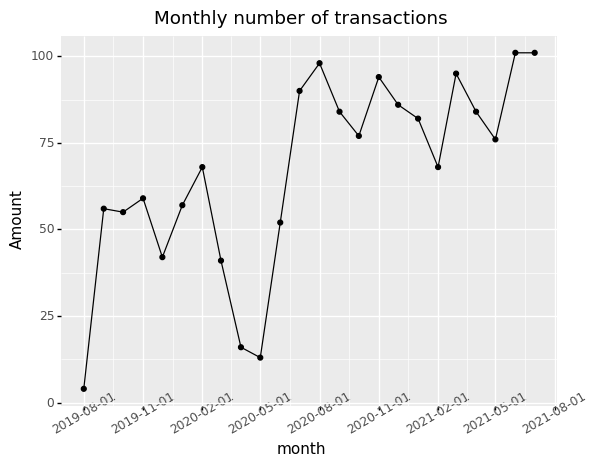

<ggplot: (-9223372036552341567)>

In [150]:
(
    spendings[(spendings["Type"] != "Payment") & (spendings["Category"] != "Travel")]
    .assign(month = lambda r: r["day"] + pd.offsets.MonthBegin(-1))
    .groupby("month")
    .count()
    .reset_index()
    .pipe(ggplot)
    +aes(x = "month", y = "Amount")
    +geom_line()
    +geom_point()
    +labs(
        title = "Monthly number of transactions"
    )
    +scale_x_date(date_breaks="3 month")
    +theme(axis_text_x = element_text(angle = 30, vjust = -0.7, hjust=-0.5))
)

Notes:
* Bunch of Kauai related activities and shoes caused 2021-06 to be an outlier, but other than that my spending is pretty consistent over time, nothiing crazy

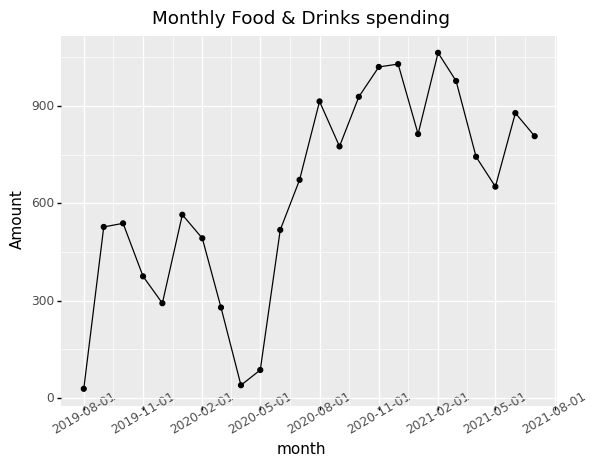

<ggplot: (303424709)>

In [151]:
# Did I start eating out more than normal recently?

(
    spendings[(spendings["Category"] == "Food & Drink")]
    .assign(month = lambda r: r["day"] + pd.offsets.MonthBegin(-1))
    .groupby("month")
    .sum()
    .reset_index()
    .pipe(ggplot)
    +aes(x = "month", y = "Amount")
    +geom_line()
    +geom_point()
    +labs(
        title = "Monthly Food & Drinks spending"
    )
    +scale_x_date(date_breaks="3 month")
    +theme(axis_text_x = element_text(angle = 30, vjust = -0.7, hjust=-0.5))
)

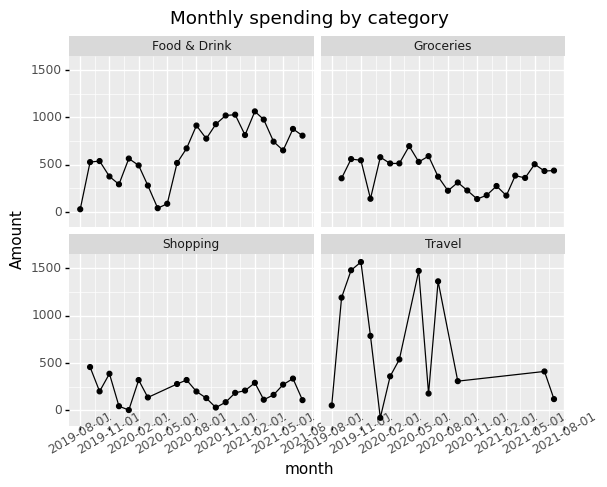

<ggplot: (303469772)>

In [152]:
(
    spendings[(spendings["Category"].isin(["Shopping", "Travel", "Food & Drink", "Groceries"]))]
    .assign(month = lambda r: r["day"] + pd.offsets.MonthBegin(-1))
    .groupby(["Category", "month"])
    .sum()
    .reset_index()
    .pipe(ggplot)
    +aes(x = "month", y = "Amount")
    +geom_line()
    +geom_point()
    +facet_wrap("Category")
    +labs(
        title = "Monthly spending by category"
    )
    +scale_x_date(date_breaks="3 month")
    +theme(axis_text_x = element_text(angle = 30, vjust = -0.7, hjust=-0.5))
)

Notes
* Obviously during the pandemic height, my food spending dropped substantially since I was not going out much
* But since I've moved to Hawaii, it's been stable around ~900/month range
* I could probably drop it down to 600/month range if I really try
* Moving to Hawaii did cost me >1k, but I have not really traveled since (except to Kauai)
* Shopping and Grocery spendings are pretty consistent, which is good

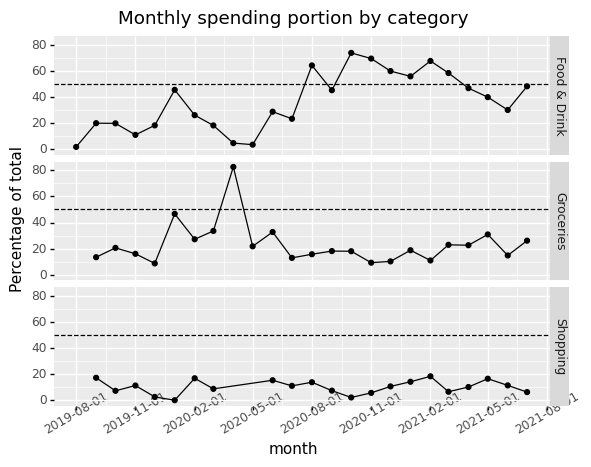

<ggplot: (303071145)>

In [153]:
(
    spendings[(spendings["Type"] != "Payment")]
    .assign(month = lambda r: r["day"] + pd.offsets.MonthBegin(-1))
    .groupby(["Category", "month"])
    .agg({'Amount': 'sum'})
    .groupby(level=1).apply(lambda x: 100 * x / float(x.sum()))
    .reset_index()
    .query('Category in ["Shopping", "Food & Drink", "Groceries"]')
    .pipe(ggplot)
    +aes(x = "month", y = "Amount")
    +geom_line()
    +geom_point()
    +geom_hline(yintercept = 50, linetype = "dashed")
    +facet_grid("Category ~ .")
    +labs(
        title = "Monthly spending portion by category",
        y = "Percentage of total"
    )
    +scale_x_date(date_breaks="3 month")
    +theme(axis_text_x = element_text(angle = 30, vjust = -0.7, hjust=-0.5))
)

Notes: 
* Fascinating! 80% of the spending was on Grocery when the pandemic started, obviously started dropping once I moved to hawaii
* Inverse correlation between eating out vs grocery!
* Ideally I can do less than 50 percent of my spendings on eating out and get grocery to 50 percent

In [154]:
# Q: What are the most expensive purchases?
(
    spendings
    .sort_values(by=['Amount'], ascending=False)
    .head(10)
)

,Transaction Date,Post Date,Description,Category,Type,Amount,Memo,day
1764,8/31/2019,09/02/2019,TRUENORTH HEALTH,Health & Wellness,Sale,1482.00,NaN,2019-08-31
1181,07/06/2020,07/07/2020,AIRBNB HMZ3QF2Y8R,Travel,Sale,1362.25,NaN,2020-07-06
1255,05/27/2020,05/28/2020,AIRBNB HMZ3QF2Y8R,Travel,Sale,1217.90,NaN,2020-05-27
1694,10/2/2019,10/06/2019,KOREAN AIR 1802329267534,Travel,Sale,772.59,NaN,2019-10-02
1611,11/13/2019,11/15/2019,AEROFLOT 5557475422741,Travel,Sale,737.80,NaN,2019-11-13
1761,9/3/2019,09/05/2019,AEROFLOT 5557410226381,Travel,Sale,618.20,NaN,2019-09-03
1317,03/07/2020,03/09/2020,AEROFLOT 5557508747182,Travel,Sale,501.70,NaN,2020-03-07
1710,9/27/2019,09/29/2019,Chase Travel,Travel,Sale,350.24,NaN,2019-09-27
195,06/15/2021,06/16/2021,TOUR* NA PALI,Entertainment,Sale,332.14,NaN,2021-06-15
523,02/20/2021,02/22/2021,LA VIE BY G.LION,Food & Drink,Sale,312.73,NaN,2021-02-20


Notes:
* All of them except the one by OneMedical are pretty justified and well utilized
* Most are one time travel related expenses

In [155]:
# Q: Is there particular location I spend most money on?
(
    spendings
    .groupby(["Description", "Category"])
    .sum()
    .reset_index()
    .sort_values(by=["Amount"], ascending=False)
    .head(10)
)

,Description,Category,Amount,Memo
45,AIRBNB HMZ3QF2Y8R,Travel,2580.15,0.0
292,SP * MAMASEZZ,Groceries,2366.00,0.0
281,SAFEWAY #1490,Groceries,1677.02,0.0
244,MUSUBI CAFE IYASUME,Food & Drink,1676.82,0.0
19,ABC #21 HAWAII,Groceries,1652.23,0.0
353,TST* HONOLULU COFFEE - EX,Food & Drink,1641.61,0.0
355,TST* ISLAND BREW COFFEEHO,Food & Drink,1410.90,0.0
350,TRUENORTH HEALTH,Health & Wellness,1306.00,0.0
367,VZWRLSS*PRPAY AUTOPAY,Bills & Utilities,917.66,0.0
214,KOREAN AIR 1802329267534,Travel,772.59,0.0


## Deal with coffee shops

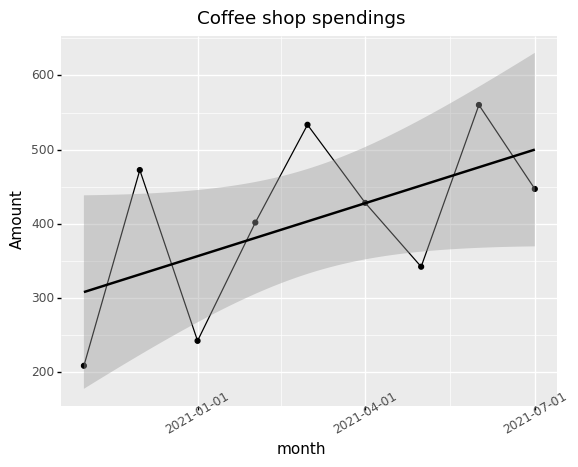

<ggplot: (302662783)>

In [156]:
# Q: How much do I spend on coffee shops monthly?
(
    spendings[(spendings["Description"].isin(
        ["TST* HONOLULU COFFEE - EX", "TST* ISLAND BREW COFFEEHO", "DECK &amp; KNOTS"]
    ))]
    .assign(month = lambda r: r["day"] + pd.offsets.MonthBegin(-1))
    .groupby(["month"])
    .sum()
    .reset_index()
    .pipe(ggplot)
    +aes(x = "month", y = "Amount")
    +geom_line()
    +geom_point()
    +geom_smooth(method = "glm")
    +labs(
        title = "Coffee shop spendings"
    )
    +scale_x_date(date_breaks="3 month")
    +theme(axis_text_x = element_text(angle = 30, vjust = -0.7, hjust=-0.5))
)

Notes: 
* Okay, this has to stop, it has gone up from 300 -> 500 in a year period
* I need to establish:
  * A plan on which dates to go to coffee shop and which dates to work from home
  * Start eating breakfast at home so that I can reduce the money I spend on coffee shops

## Conclusion

* If you exclude one time expenses (such as travel), my spending is pretty consistent
* Travel is really expensive, regardless of how you do it. Sudden increases in spendings are mostly explained by travels
* 2021-06 was a bit of an outlier, but that is driven by Kauai trip and running shoes
* Amount of money I'm spending on coffee shops is bit concerning. Of my monthly budget of 1500, 1000 is spent on food, and 500 of those on coffee shops alone (at least). That itself is fine, but the trend is what concerns me, it's gone up from 300 -> 500 in 6months time period. 
* Action items: 
  * From now on I think it's just easier if I go to coffee shops only on odd numbered days (this enables me to avoid having to go to coffee shops too often)
  * 50 percent of the total spending in grocery is the new goal
  * Once I start cooking dinner at home for even numbered days (mostly brown rice + tofu + veggies) grocery spendings should naturally come up
  * I am pretty sure I can save 4k a month to Fidelity without any impact on my spendings
